In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import random as rd
import math
from shapely.geometry import *

### Line-Line Intersection
두 직선의 교차여부 판단<br>
선분1의 두점과 선분2의 양 끝점을 ccw 검토하여 서로 방향이 다른지 판단<br>
마찬가지로 선분2의 두점과 선분1의 양 끝점을 검토<br>
양 선분 모두 만족할경우, 두 선분이 교차한다고 판단<br>

In [3]:
def ccw(pts):
    x1, y1, x2, y2, x3, y3 = pts[0][0], pts[0][1], pts[1][0], pts[1][1], pts[2][0], pts[2][1]
    cross_product = ((x2-x1)*(y3-y1)) - ((x3-x1)*(y2-y1))
    if cross_product < 0:
        return -1
    elif cross_product > 0:
        return 1
    else:
        return 0

In [4]:
def finding_bigger(pts):
    pts = sorted(pts, key= lambda x: (x[0], x[1]))
    bigger, smaller = pts[1], pts[0]
    return bigger, smaller

In [5]:
def check_cross(pts):
    p1, p2, p3, p4 = [pts[0], pts[1]], [pts[2], pts[3]], [pts[4], pts[5]], [pts[6], pts[7]]
    v1 = ccw([p1, p2, p3]) * ccw([p1, p2, p4])
    v2 = ccw([p3, p4, p1]) * ccw([p3, p4, p2])
    
    # 두 선분이 동일 선상에 있을 경우
    # ex) [[0,0], [5,0], [6,0], [10,0]]
    if v1 == 0 and v2 == 0:
        b1, s1 = finding_bigger([p1, p2])
        b2, s2 = finding_bigger([p3, p4])
        if b1 >= s2 and b2 >= s1:
            return True 
        else:
            return False 
    elif v1 <= 0 and v2 <= 0:
        return True 
    else:
        return False

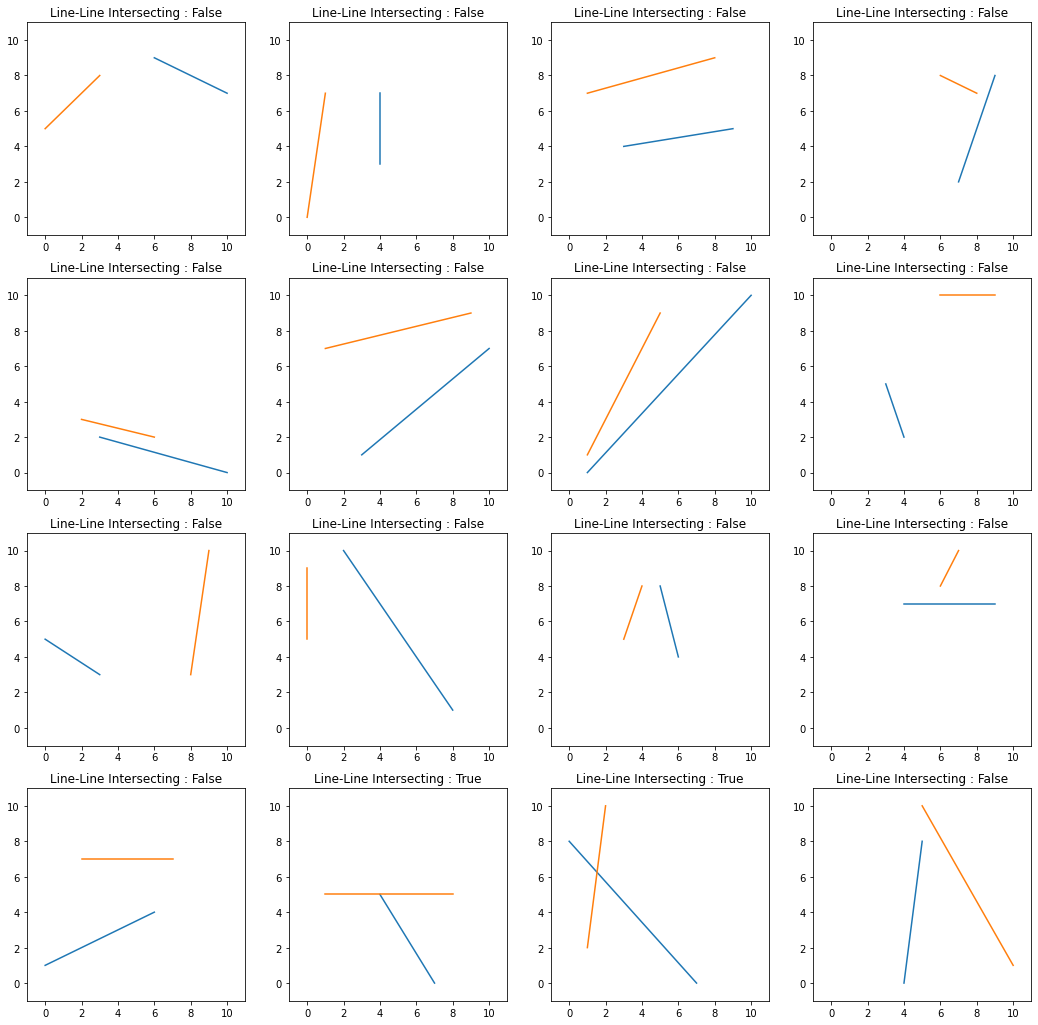

In [6]:
fig, ax = plt.subplots(4, 4, figsize=(18, 18))
for i in range(4):
    for j in range(4):
        pts = [rd.randint(0, 10) for _ in range(8)]
        l1 = LineString([(pts[0], pts[1]), (pts[2], pts[3])])
        l2 = LineString([(pts[4], pts[5]), (pts[6], pts[7])])
        ax[i][j].plot(*l1.xy, *l2.xy)
        result = check_cross(pts)
        ax[i][j].set_title(f'Line-Line Intersecting : {result}')
        ax[i][j].set_xlim(-1,11)
        ax[i][j].set_ylim(-1,11)
plt.show()

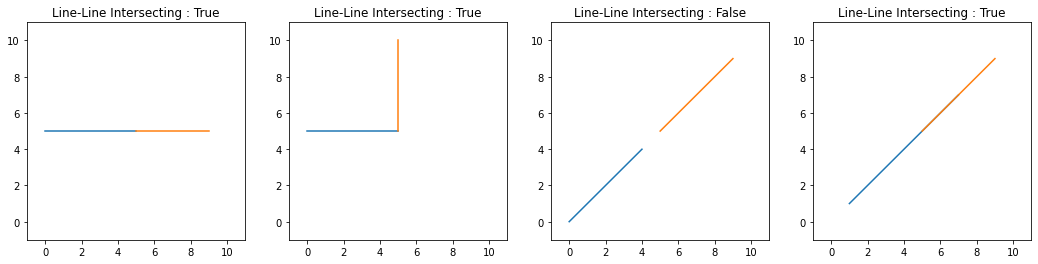

In [7]:
test = [[0,5, 5,5, 5,5, 9,5], [0,5, 5,5, 5,5, 5,10], [0,0, 4,4, 5,5, 9,9], [1,1, 7,7, 5,5, 9,9]]

fig, ax = plt.subplots(1, 4, figsize=(18, 4))
for i in range(4):
    l1 = LineString([(test[i][0], test[i][1]), (test[i][2], test[i][3])])
    l2 = LineString([(test[i][4], test[i][5]), (test[i][6], test[i][7])])
    ax[i].plot(*l1.xy, *l2.xy)
    result = check_cross(test[i])
    ax[i].set_title(f'Line-Line Intersecting : {result}')
    ax[i].set_xlim(-1,11)
    ax[i].set_ylim(-1,11)
plt.show()

### Intersection Point
선분과 선분의 교차점<br>
* 교차점이 없을 경우
* 교차점이 하나일 경우
* 교차점이 다수일 경우(두 선분이 전체 혹은 부분 겹칠 경우)<br>

In [8]:
# 두 직선의 교차점 찾기
# 단, 이 방법은 선1 : ((1,0),(5,0)), 선2 : ((5,0),(9,0)) 처럼 일직선이지만 교차점이 있는 경우 실패

def location_cross_point(pts):
#     x1, y1, x2, y2, x3, y3, x4, y4 = pts[0][0], pts[0][1], pts[1][0], pts[1][1], pts[2][0], pts[2][1], pts[3][0], pts[3][1]
    x1, y1, x2, y2, x3, y3, x4, y4 = pts[0], pts[1], pts[2], pts[3], pts[4], pts[5], pts[6], pts[7]
    mn = ((x1 - x2)*(y3- y4)) - ((y1 - y2)*(x3 - x4))
    # mn = 0 을 만족하면 두 직선은 평행 또는 일치
    if mn != 0:
        cx = (((x1*y2)-(y1*x2))*(x3-x4) - (x1-x2)*((x3*y4)-(y3*x4))) / mn
        cy = (((x1*y2)-(y1*x2))*(y3-y4) - (y1-y2)*((x3*y4)-(y3*x4))) / mn
        return [cx, cy]
    return False

In [9]:
def ccw(pts):
    x1, y1, x2, y2, x3, y3 = pts[0][0], pts[0][1], pts[1][0], pts[1][1], pts[2][0], pts[2][1]
    cross_product = ((x2-x1)*(y3-y1)) - ((x3-x1)*(y2-y1))
    if cross_product < 0:
        return -1
    elif cross_product > 0:
        return 1
    else:
        return 0

In [10]:
def finding_bigger(pts):
    pts = sorted(pts, key= lambda x: (x[0], x[1]))
    bigger, smaller = pts[1], pts[0]
    return bigger, smaller

In [11]:
def angle_of_line(s1, b1):
    if (s1[0]-b1[0]) != 0:
        angle = (s1[1]-b1[1])/(s1[0]-b1[0])
    else:
        angle = 90
    return angle

In [12]:
def check_crosspt(pts):
    pts = pts
    p1, p2, p3, p4 = [pts[0], pts[1]], [pts[2], pts[3]], [pts[4], pts[5]], [pts[6], pts[7]]
    v1 = ccw([p1, p2, p3]) * ccw([p1, p2, p4])
    v2 = ccw([p3, p4, p1]) * ccw([p3, p4, p2])
    b1, s1 = finding_bigger([p1, p2])
    b2, s2 = finding_bigger([p3, p4])
    ang1 = angle_of_line(s1, b1)
    ang2 = angle_of_line(s2, b2)
    
    # 두 선분이 동일 선상에 있을 경우
    # ex) [[0,0], [5,0], [6,0], [10,0]]
    if v1 == 0 and v2 == 0 and ang1 == ang2:
        # 두 선분이 동일 선상에 있으면서 두 선분 중 동일한 좌표가 있을경우, 그 좌표가 교차점이 됨
        if b1 == s2:
            intersection_point = b1
        elif b2 == s1:
            intersection_point = b2
        # 두 선분이 동일 선상에 있으면서, 일정부분 겹칠 경우
        elif b2 == b1 or s2 == s1:
            intersection_point = 'Much'
        elif b1 >= s2 and b2 >= s1:
            intersection_point = 'Much'
        else:
            intersection_point = 'None' # 교차하지 않음
    elif v1 <= 0 and v2 <= 0:
        intersection_point = location_cross_point(pts)
    else:
        intersection_point = 'None'
    
    return intersection_point

__기존 check_cross함수와 location_cross_point(pts)함수와의 불연계성__<br>

기존 check_cross의 경우 두 선분의 ccw값이 모두 0일 경우 (예외 경우 제외 교차하지 않는다)<br>
예외경우 : 두 선분의 기울기가 동일하거나 두 선분 중 한점이 동일하여 만나는 경우<br>
두 선분의 기울기가 동일하여도 두 선분의 교차여부는 다시 2가지 경우로 구분된다(교차한다, 교차하지 않는다)<br>
두 선분의 기울기가 동일하여도 두 선분의 교차점의 개수는 3가지 경우로 구분된다(교차점 없음, 교차점 1개, 교차점 다수)<br>
* 교차점 0개 : 기울기가 동일한 두 선분이 서로 겹치지 않음
* 교차점 1개 : 기울기가 동일한 두 선분이 한점에서 만남
* 교차점 다수 : 기울기가 동일한 두 선분이 전체 혹은 부분 겹쳐짐
두 선분 중 한점이 동일하여 만나는 경우 교차점 개수는 언제나 1개 이다.<br>

즉, ccw값이 0인 경우 중 예외상황에서도 교차점 개수의 결과값이 동일하지 않기때문에 재 판정하는 과정이 필요하다<br>

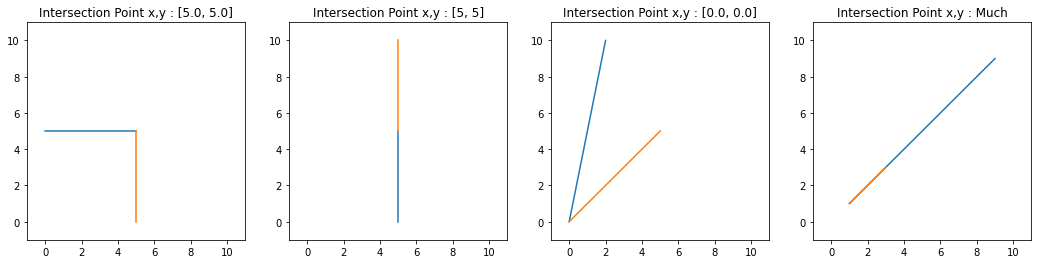

In [13]:
test = [[0,5, 5,5, 5,5, 5,0], [5,0, 5,5, 5,5, 5,10], [0,0, 2,10, 5,5, 0,0], [9,9, 1,1, 1,1, 3,3]]

fig, ax = plt.subplots(1, 4, figsize=(18, 4))
for i in range(4):
    l1 = LineString([(test[i][0], test[i][1]), (test[i][2], test[i][3])])
    l2 = LineString([(test[i][4], test[i][5]), (test[i][6], test[i][7])])
    ax[i].plot(*l1.xy, *l2.xy)
    result = check_crosspt(test[i])
    ax[i].set_title(f'Intersection Point x,y : {result}')
    ax[i].set_xlim(-1,11)
    ax[i].set_ylim(-1,11)
plt.show()

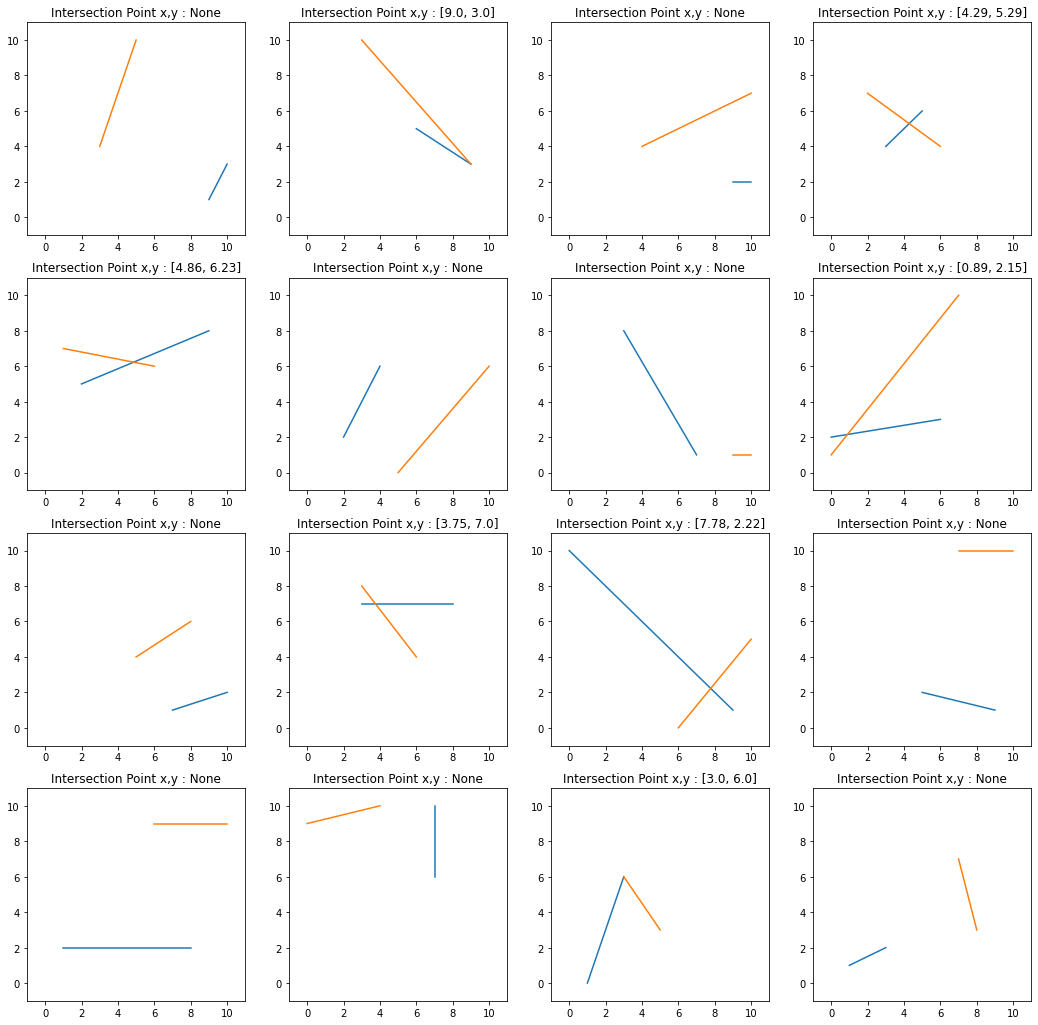

In [14]:
fig, ax = plt.subplots(4, 4, figsize=(18, 18))
for i in range(4):
    for j in range(4):
        pts = [rd.randint(0, 10) for _ in range(8)]
        l1 = LineString([(pts[0], pts[1]), (pts[2], pts[3])])
        l2 = LineString([(pts[4], pts[5]), (pts[6], pts[7])])
        ax[i][j].plot(*l1.xy, *l2.xy)
        result = check_crosspt(pts)
        if type(result) == list:
            result = [round(_ ,2) for _ in result] # 출력 편의상 소수점 3째자리에서 반올림
        ax[i][j].set_title(f'Intersection Point x,y : {result}')
        ax[i][j].set_xlim(-1,11)
        ax[i][j].set_ylim(-1,11)
plt.show()